In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/Users/varun/Downloads/dataset_sdn.csv')
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [3]:
print(data['Protocol'].unique())

['UDP' 'TCP' 'ICMP']


#### I .Data Analysis

In [4]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
le = LabelEncoder()

In [8]:
data['Protocol'] = le.fit_transform(data['Protocol'])

In [9]:
print(data['Protocol'])

0         2
1         2
2         2
3         2
4         2
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: Protocol, Length: 104345, dtype: int64


In [10]:
data.shape

(104345, 23)

In [11]:
data.label.unique()

array([0, 1])

In [12]:
data.label.value_counts()

0    63561
1    40784
Name: label, dtype: int64

In [13]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,...,104345.000000,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,...,212.210676,0.600987,0.925890,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,...,246.855123,0.489698,0.844045,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,...,-4365.000000,0.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,...,0.000000,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,...,276.000000,1.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,...,333.000000,1.000000,2.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,...,639.000000,1.000000,2.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [14]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0


In [15]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,3,15099,14693,1,1.0,2.0,0


In [16]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [17]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print(numeric_cols)
object_cols

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')


Index(['src', 'dst'], dtype='object')

In [18]:
data=data.dropna()

In [19]:
o= list(data.select_dtypes(include=['object']).columns)
o=o+['port_no']
df=data.drop(columns=o)
df

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,2,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,2,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,15209,12720,1,1.0,2.0,0


In [35]:
x=df.drop(["Protocol","label","Pairflow"],axis=1)
y=df["Protocol"]

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# X is your feature matrix and y is your target variable
selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(x, y)

# Print the names of the selected features
selected_features = x.columns[selector.get_support(indices=True)]
print(selected_features)


Index(['dt', 'pktcount', 'bytecount', 'packetins', 'pktperflow', 'byteperflow',
       'pktrate', 'tx_bytes', 'rx_bytes', 'tot_kbps'],
      dtype='object')


In [38]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X_new,y,test_size=0.3)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train a KNN classifier
cl = KNeighborsClassifier(n_neighbors=5)
cl.fit(x1_train, y1_train)
# Make predictions on the test set
y1_pred = cl.predict(x1_test)
# Calculate the accuracy score
accuracy = accuracy_score(y1_test, y1_pred)*100
print("Accuracy:", accuracy)


Accuracy: 89.05367231638418


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train a KNN classifier
clr = KNeighborsClassifier(n_neighbors=5)
clr.fit(x2_train, y2_train)
# Make predictions on the test set
y2_pred = clr.predict(x2_test)
# Calculate the accuracy score
accuracy = accuracy_score(y2_test, y2_pred)*100
print("Accuracy:", accuracy)


Accuracy: 97.57318952234206


By selecting only the important features in feature selection process, the accuracy of the model increases.

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

precision = precision_score(y1_test, y1_pred, average='weighted')
recall = recall_score(y1_test, y1_pred, average='weighted')
f1 = f1_score(y1_test, y1_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.889325846966279
Recall: 0.8905367231638418
F1 Score: 0.8886906147868255


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

precision = precision_score(y2_test, y2_pred, average='weighted')
recall = recall_score(y2_test, y2_pred, average='weighted')
f1 = f1_score(y2_test, y2_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9759172113597611
Recall: 0.9757318952234206
F1 Score: 0.9757491651496272


In [45]:
from sklearn.metrics import confusion_matrix

# y_true: actual labels, y_pred: predicted labels
cm = confusion_matrix(y1_test, y1_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[11202   889   223]
 [ 1214  6793   835]
 [   54   195  9747]]


In [46]:
from sklearn.metrics import confusion_matrix

# y_true: actual labels, y_pred: predicted labels
cm = confusion_matrix(y2_test, y2_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12011    71   248]
 [  130  8427   151]
 [  120    36  9958]]


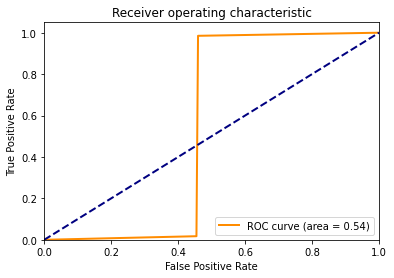

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y2_test, y2_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


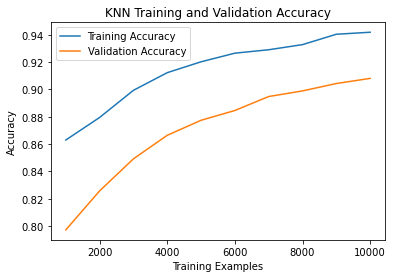

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# train the model and get the accuracy scores for training and validation sets
train_acc = []
val_acc = []
for i in range(1, 11):
    clr.fit(x2_train[:i*1000], y2_train[:i*1000])
    y_train_pred = clr.predict(x2_train[:i*1000])
    y_val_pred = clr.predict(x2_test)
    train_acc.append(accuracy_score(y2_train[:i*1000], y_train_pred))
    val_acc.append(accuracy_score(y2_test, y_val_pred))

# plot the accuracy scores over time
plt.plot(range(1000, 10001, 1000), train_acc, label='Training Accuracy')
plt.plot(range(1000, 10001, 1000), val_acc, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('KNN Training and Validation Accuracy')
plt.legend()
plt.show()


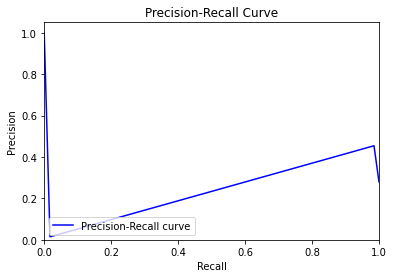

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# y_score: predicted probabilities
precision, recall, thresholds = precision_recall_curve(y2_test, y2_pred, pos_label=1)

plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
